<a href="https://colab.research.google.com/github/Phuc0417/AI_2023/blob/main/NguyenHoangPhuc_20146417(GfrFIS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=f06700fb935918f7985f57e92d2c8433dd1f533548b7dd79da0785951a4d6d11
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


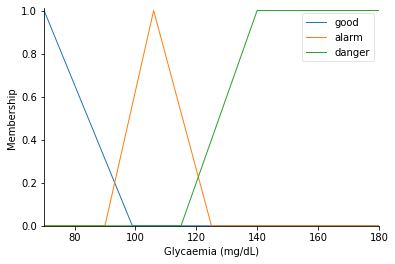

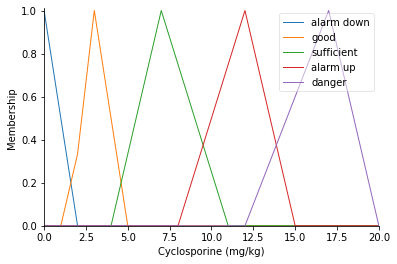

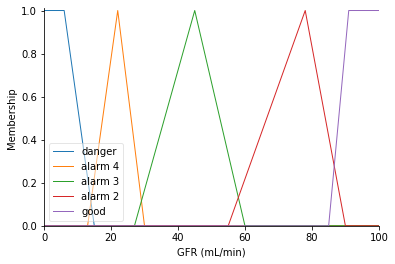

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 


Glycaemia_Level = ctrl.Antecedent(np.arange(70,180.1,1),'Glycaemia (mg/dL)')
Cyclosporine_Level = ctrl.Antecedent(np.arange(0,20.1,1),'Cyclosporine (mg/kg)')
GFR_Level = ctrl.Consequent(np.arange(0,100.1,1),'GFR (mL/min)')

Glycaemia_Level['good'] = fuzz.trimf(Glycaemia_Level.universe,[70,70,99])
Glycaemia_Level['alarm'] = fuzz.trimf(Glycaemia_Level.universe,[90,106,125])
Glycaemia_Level['danger'] = fuzz.trapmf(Glycaemia_Level.universe,[115,140,180,180])

Cyclosporine_Level['alarm down'] = fuzz.trimf(Cyclosporine_Level.universe,[0,0,2])
Cyclosporine_Level['good'] = fuzz.trimf(Cyclosporine_Level.universe,[1.5,3,5])
Cyclosporine_Level['sufficient'] = fuzz.trimf(Cyclosporine_Level.universe,[4,7,11])
Cyclosporine_Level['alarm up'] = fuzz.trimf(Cyclosporine_Level.universe,[8,12,15])
Cyclosporine_Level['danger'] = fuzz.trimf(Cyclosporine_Level.universe,[12,17,20])

GFR_Level['danger'] = fuzz.trapmf(GFR_Level.universe,[0,0,6,15])
GFR_Level['alarm 4'] = fuzz.trimf(GFR_Level.universe,[13,22,30])
GFR_Level['alarm 3'] = fuzz.trimf(GFR_Level.universe,[27,45,60])
GFR_Level['alarm 2'] = fuzz.trimf(GFR_Level.universe,[55,78,90])
GFR_Level['good'] = fuzz.trapmf(GFR_Level.universe,[85,91,100,100])

Glycaemia_Level.view()
Cyclosporine_Level.view()
GFR_Level.view()


In [ ]:
# follow table 2:
rule1 = ctrl.Rule(Glycaemia_Level['danger'] & Cyclosporine_Level['danger'], GFR_Level['danger'])
rule2 = ctrl.Rule(Glycaemia_Level['good'] & Cyclosporine_Level['danger'], GFR_Level['alarm 3'])
rule3 = ctrl.Rule(Glycaemia_Level['alarm'] & Cyclosporine_Level['alarm up'], GFR_Level['alarm 4'])
rule4 = ctrl.Rule(Glycaemia_Level['good'] & Cyclosporine_Level['sufficient'], GFR_Level['alarm 2'])
rule5 = ctrl.Rule(Glycaemia_Level['good'] & Cyclosporine_Level['good'], GFR_Level['good'])
rule6 = ctrl.Rule(Glycaemia_Level['alarm'] & Cyclosporine_Level['good'], GFR_Level['alarm 2'])
rule7 = ctrl.Rule(Glycaemia_Level['danger'] & Cyclosporine_Level['good'], GFR_Level['alarm 3'])

GFR_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])

GFR = ctrl.ControlSystemSimulation(GFR_ctrl)



74.15


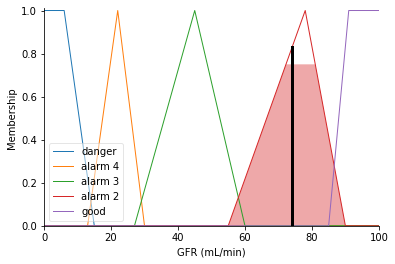

In [ ]:
GFR.input['Glycaemia (mg/dL)'] = 70
GFR.input['Cyclosporine (mg/kg)'] = 8
GFR.compute()
print(GFR.output['GFR (mL/min)'])
GFR_Level.view(sim=GFR)